# New Text Classification: Language Anxiety

## Installing Package

In [ ]:
!pip install xgboost lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split, GridSearchCV

## Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

## Utils
from sklearn.utils import shuffle, class_weight

## Text Representation
from sklearn.feature_extraction.text import TfidfVectorizer

## Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## **Reading The Dataset**

In [ ]:
df = pd.read_excel('new_dataset_2class.xlsx')
df = df[["post", "LA Classification"]]
df.head()

,post,LA Classification
0,The place I've been to that I love and always ...,Anxiety
1,"My favorite place is Hat Yai in Thailand, spec...",No Anxiety
2,One of my favorite places that i have been vis...,No Anxiety
3,"When I was in 6th grade, I went on a vacation ...",Anxiety
4,"My favorite place is Bali, I like Bali so much...",Anxiety


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   post               324 non-null    object
 1   LA Classification  324 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB


## Checking Class Distribution

LA Classification
Anxiety       241
No Anxiety     83
Name: count, dtype: int64



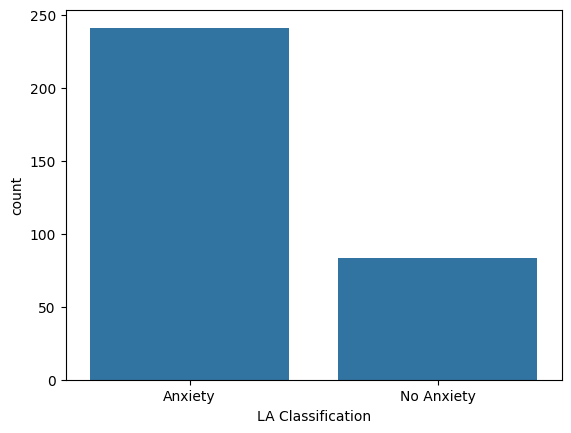

In [ ]:
print(df['LA Classification'].value_counts())
print()

# create LA Classification visualization
sns.countplot(x='LA Classification', data=df)
plt.show()

## **Encode The Target Variable**

In [ ]:
label_encoder = LabelEncoder()

df['la_class'] = label_encoder.fit_transform(df['LA Classification'])

# Menampilkan mapping kelas ke nilai encoded
print("Mapping kelas ke nilai encoded:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label}: {i}")

df.drop(columns=['LA Classification'], inplace=True)

Mapping kelas ke nilai encoded:
Anxiety: 0
No Anxiety: 1


In [ ]:
df.head()

,post,la_class
0,The place I've been to that I love and always ...,0
1,"My favorite place is Hat Yai in Thailand, spec...",1
2,One of my favorite places that i have been vis...,1
3,"When I was in 6th grade, I went on a vacation ...",0
4,"My favorite place is Bali, I like Bali so much...",0


## Text Preprocessing

### Contraction Mapping

In [ ]:
contraction_mapping = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how does",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contraction_mapping):
    for contraction, expanded in contraction_mapping.items():
        text = text.replace(contraction, expanded)
    return text

df['post'] = df['post'].apply(lambda x: expand_contractions(x, contraction_mapping))

### Text Cleaning

In [ ]:
## NOTE ##
## Do Not Use This Code If Using Embedding Like BERT and something similar to it.

# import re
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# all_stopwords = stopwords.words('english')
# all_stopwords.remove('not')

# lemmatizer = WordNetLemmatizer()

# def preprocess_text(text):
#     # Hapus karakter non-alphanumeric
#     text = re.sub('[^a-zA-Z]', ' ', text)
#     # Konversi teks ke huruf kecil
#     text = text.lower()
#     # Split teks menjadi kata-kata
#     words = text.split()
#     # Lematisasi dan hapus stop words
#     words = [lemmatizer.lemmatize(word) for word in words]
#     # Gabungkan kata-kata kembali menjadi satu string
#     processed_text = ' '.join(words)

#     return processed_text

# df['post'] = df['post'].apply(preprocess_text)

## Feature Extraction

In [ ]:
# import gensim.downloader as api

# # Download the pre-trained Word2Vec model (you can choose a different one)
# wv = api.load('word2vec-google-news-300')

# def get_word_vector(word):
#   try:
#     return wv[word]
#   except KeyError:
#     return np.zeros(300)

# def document_vector(document):
#   words = document.split()
#   word_vectors = [get_word_vector(word) for word in words]
#   return np.mean(word_vectors, axis=0)

# df['post'] = df['post'].apply(document_vector)
# df.head()

In [ ]:
!pip install transformers

from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Ensure model is in evaluation mode
model.eval()

# Check if GPU is available and move model to GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def bert_embedding(text):
    # Tokenize the text
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)

    # Move tensors to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Get BERT embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.squeeze(0)  # Remove batch dimension

    # Use the [CLS] token embedding as the document embedding
    document_embedding = embeddings[0].cpu().numpy()

    return document_embedding

# Apply BERT embeddings to the DataFrame
df['post'] = df['post'].apply(bert_embedding)
df.head()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

,post,la_class
0,"[0.05825485, 0.01042533, -0.18960966, -0.27989...",0
1,"[-0.12897348, -0.12453145, -0.13303237, 0.0391...",1
2,"[-0.119152665, -0.34319058, -0.048592232, 0.25...",1
3,"[-0.15990193, -0.047270223, -0.06591638, -0.19...",0
4,"[-0.08017804, -0.3335203, 0.25677717, -0.15030...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   post      324 non-null    object
 1   la_class  324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


## Splitting The Data

In [ ]:
# Convert the list of vectors into a DataFrame
X_flattened = pd.DataFrame(df['post'].tolist())

# Now X_flattened is the new X
X = X_flattened

y = df['la_class']

## Defining Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y)),
    "LightGBM": LGBMClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y)),
}

## Defining Cross Validation

In [ ]:
cv = StratifiedKFold(n_splits=5)

## Calculating Each Model Performance

In [ ]:
results = []
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_scores.mean(),
        'Precision': precision_scores.mean(),
        'Recall': recall_scores.mean(),
        'F1-score': f1_scores.mean()
    })

results_df = pd.DataFrame(results)

[LightGBM] [Info] Number of positive: 67, number of negative: 192
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67031
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258687 -> initscore=-1.052803
[LightGBM] [Info] Start training from score -1.052803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.663654,0.343135,0.375735,0.357044
1,Decision Tree,0.626875,0.280134,0.308824,0.261441
2,Random Forest,0.743846,0.000000,0.011765,0.000000
3,Naive Bayes,0.635962,0.347273,0.495588,0.400109
4,SVM,0.583365,0.325807,0.591176,0.417475
5,XGBoost,0.697596,0.291905,0.145588,0.193317
6,LightGBM,0.703894,0.283810,0.108088,0.154812


## Model Performances Visualization

### Accuracy

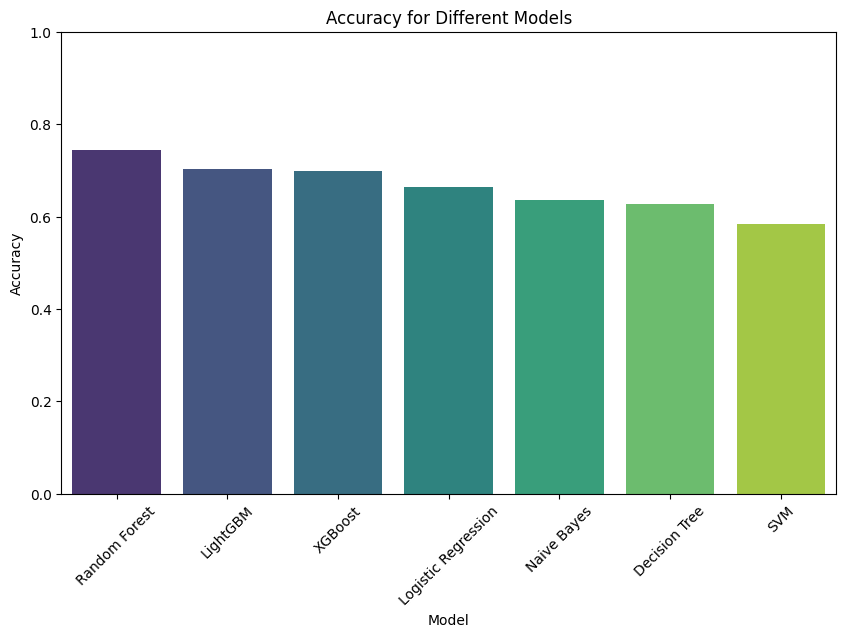

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Accuracy', ascending=False)
sns.barplot(x='Model', y='Accuracy', data=sorted_df, palette='viridis')
plt.title('Accuracy for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### Precision

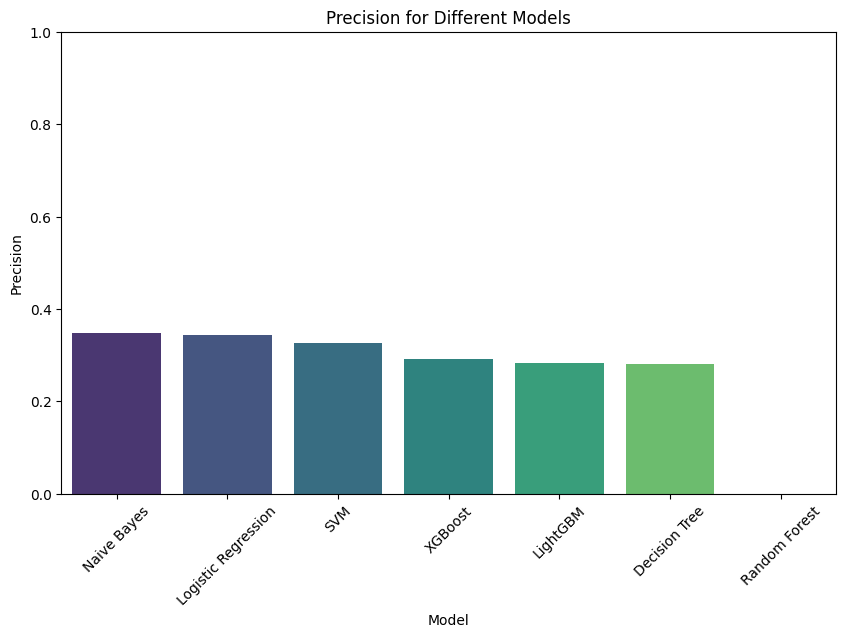

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Precision', ascending=False)
sns.barplot(x='Model', y='Precision', data=sorted_df, palette='viridis')
plt.title('Precision for Different Models')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### Recall

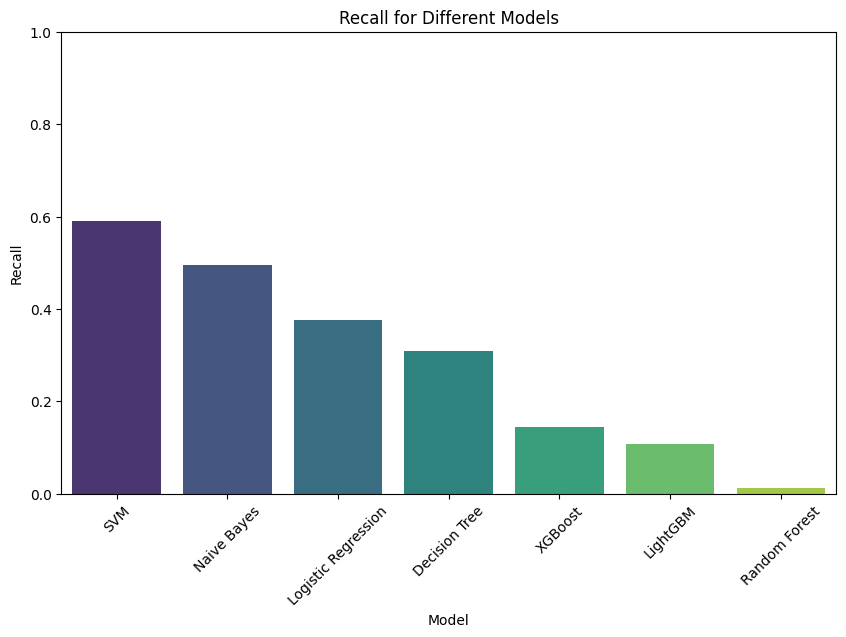

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Recall', ascending=False)
sns.barplot(x='Model', y='Recall', data=sorted_df, palette='viridis')
plt.title('Recall for Different Models')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### F1-score

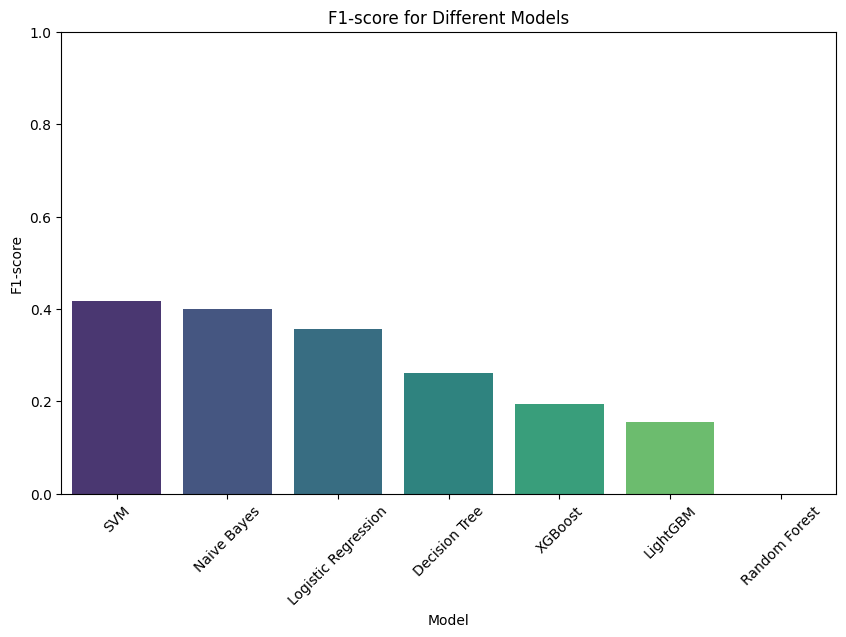

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='F1-score', ascending=False)
sns.barplot(x='Model', y='F1-score', data=sorted_df, palette='viridis')
plt.title('F1-score for Different Models')
plt.ylabel('F1-score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()